In [1]:
from keras.models import load_model
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay, accuracy_score, classification_report
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Montando o google drive para acessar imagens
from google.colab import drive
drive.mount('/content/gdrive')
path = "/content/gdrive/MyDrive/Colab Notebooks/"

Mounted at /content/gdrive


Tamanho das imagens

In [3]:
IMAGE_SIZE = [400, 400]

In [4]:
train_path = path+'ebhi-split-2categorias/train'
valid_path = path+'ebhi-split-2categorias/val'
test_path = path+'ebhi-split-2categorias/test'

Declarando o modelo Inceptionv3

In [5]:
inception = InceptionV3(input_shape=IMAGE_SIZE +
                        [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 61s 1us/step


Não treina camadas

In [6]:
for layer in inception.layers:
    layer.trainable = False


Adicionando as nossas camadas

In [7]:
x = Flatten()(inception.output)
# x = Dense(1000, activation='relu')(x)
#prediction = Dense(len(folders), activation='softmax')(x)
prediction = Dense(1, activation='sigmoid')(x)

Criando o modelo

In [8]:
model = Model(inputs=inception.input, outputs=prediction)

Visualizando a estrutura do modelo

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 400, 400, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 199, 199, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 199, 199, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 199, 199, 32)         0         ['batch_normalization[0][0

Declarando para o modelo as funções de custo e otimização

In [10]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(400, 400),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 1163 images belonging to 2 classes.


In [14]:
valid_set = valid_datagen.flow_from_directory(valid_path,
                                              target_size=(400, 400),
                                              batch_size=32,
                                              class_mode='binary')

Found 387 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(400, 400),
                                            batch_size=32,
                                            shuffle=False,
                                            class_mode='binary')

Found 390 images belonging to 2 classes.


Treinando o modelo

In [16]:
r = model.fit(
    training_set,
    validation_data=valid_set,
    epochs=8,
    steps_per_epoch=len(training_set),
    validation_steps=len(valid_set)
)


Epoch 1/8
37/37 [==============================] - 537s 14s/step - loss: 1.0019 - accuracy: 0.8762 - val_loss: 0.5664 - val_accuracy: 0.9406
Epoch 2/8
37/37 [==============================] - 79s 2s/step - loss: 0.3519 - accuracy: 0.9510 - val_loss: 0.5259 - val_accuracy: 0.9457
Epoch 3/8
37/37 [==============================] - 78s 2s/step - loss: 0.4319 - accuracy: 0.9510 - val_loss: 0.6206 - val_accuracy: 0.9509
Epoch 4/8
37/37 [==============================] - 77s 2s/step - loss: 0.3501 - accuracy: 0.9604 - val_loss: 0.6399 - val_accuracy: 0.9561
Epoch 5/8
37/37 [==============================] - 77s 2s/step - loss: 0.2139 - accuracy: 0.9708 - val_loss: 0.6436 - val_accuracy: 0.9535
Epoch 6/8
37/37 [==============================] - 76s 2s/step - loss: 0.0779 - accuracy: 0.9819 - val_loss: 0.5982 - val_accuracy: 0.9561
Epoch 7/8
37/37 [==============================] - 77s 2s/step - loss: 0.2520 - accuracy: 0.9725 - val_loss: 1.0530 - val_accuracy: 0.9354
Epoch 8/8
37/37 [========

Perda do treino

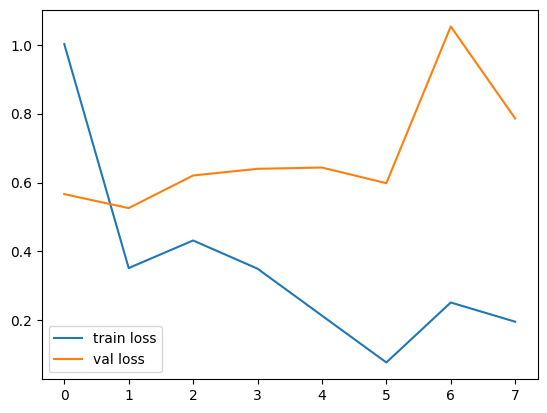

In [17]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('LossVal_loss_inception')
plt.show()


Acurácias do treino

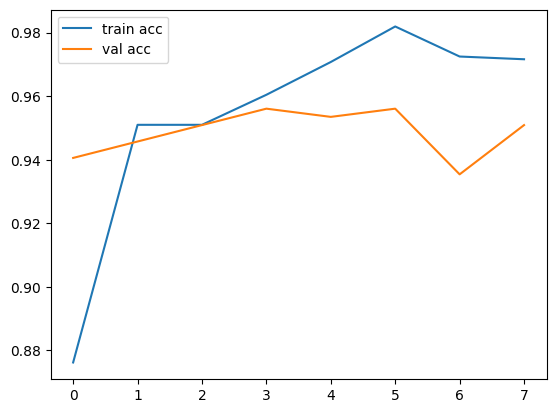

In [18]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('AccVal_acc_inception')
plt.show()

In [19]:
model.save('hist_model_inception.h5')

Etapa de Testes

13/13 [==============================] - 194s 16s/step
y predito:
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
y real:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

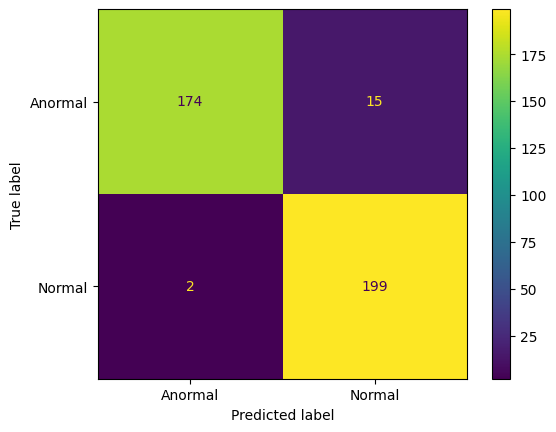

Accuracy score:  0.9564102564102565


In [20]:
inception_model = model

t = time.time()
# Usando o modelo para predição das amostras de teste
y_pred = inception_model.predict(test_set)
# Reset
#test_set.reset()
#loss, acc = inception_model.evaluate(test_set)
#aux = np.argmax(aux, axis=1)
y_pred = np.where(y_pred > 0.5, 1, 0).flatten()
print("y predito:")
print(y_pred)
y_true = test_set.classes
print("y real:")
print(y_true)
# Método para calcular o valor F1-Score
print('F1-Score: {}'.format(f1_score(y_true, y_pred, average='macro')))
# Método para calcular a Precision
print('Precision : {}'.format(precision_score(y_true, y_pred, average='macro')))
# Método para calcular o Recall
print('Recall: {}'.format(recall_score(y_true, y_pred, average='macro')))

print('Matriz de Confusão:')
cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Anormal','Normal'])
cm_display.plot()
plt.savefig('Matriz-inception')
plt.show()

print ('Accuracy score: ', accuracy_score(y_true, y_pred))
#print('Acuracia obtida com o inception16 no Conjunto de Teste EBHI: {:.2f}'.format(
#    acc))



Avaliando no UnitoPatho

Found 600 images belonging to 2 classes.
19/19 [==============================] - 271s 15s/step
y predito:
[0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1
 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1
 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1

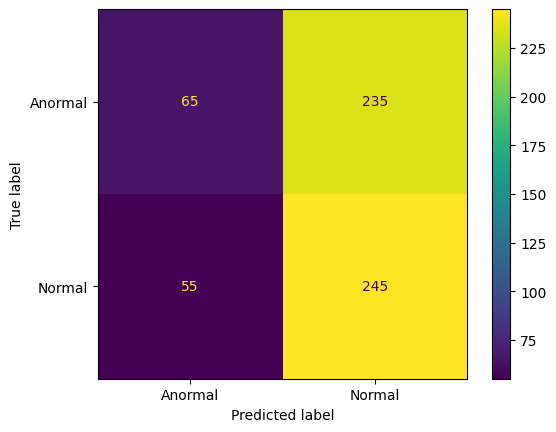

Accuracy score:  0.5166666666666667
              precision    recall  f1-score   support

           0       0.54      0.22      0.31       300
           1       0.51      0.82      0.63       300

    accuracy                           0.52       600
   macro avg       0.53      0.52      0.47       600
weighted avg       0.53      0.52      0.47       600

Acurácia cada classe


array([0.21666667, 0.81666667])

In [21]:

test_path_uni = path+'/dataset-unitopatho/'
test_datagen_uni = ImageDataGenerator(rescale=1./255)
test_set_uni = test_datagen_uni.flow_from_directory(test_path_uni,
                                            target_size=(400, 400),
                                            batch_size=32,
                                            shuffle=False,
                                            class_mode='binary',classes=['ANORMAL','NORMAL'])



y_pred = inception_model.predict(test_set_uni)
# Reset
test_set_uni.reset()
#loss, acc = inception_model.evaluate(test_set_uni)
#aux = np.argmax(aux, axis=1)
y_pred = np.where(y_pred > 0.5, 1, 0).flatten()
print("y predito:")
print(y_pred)
y_true = test_set_uni.classes
print("y real:")
print(y_true)
# Método para calcular o valor F1-Score
print('F1-Score: {}'.format(f1_score(y_true, y_pred, average='macro')))
# Método para calcular a Precision
print('Precision : {}'.format(precision_score(y_true, y_pred, average='macro')))
# Método para calcular o Recall
print('Recall: {}'.format(recall_score(y_true, y_pred, average='macro')))


print('Matriz de Confusão:')
cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Anormal','Normal'])
cm_display.plot()
plt.savefig('Matriz-inception-UNITOPATHO')
plt.show()

print ('Accuracy score: ', accuracy_score(y_true, y_pred))
#print('Acuracia obtida com o inception no Conjunto de Teste UNITOPATHO: {:.2f}'.format(
#    acc))

print(classification_report(y_true, y_pred))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Acurácia cada classe')
cm.diagonal()